**Chapter 9 - Unsupervised learning**

My solutions to the exercises

<td>
    <a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td>

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt

# Ex 10

## Load data

In [2]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\nael\scikit_learn_data


In [10]:
X = faces.data
y = faces.target

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

train_valid_idx, test_idx = next(train_test_split.split(X, y))
train_valid_data, train_valid_target = X[train_valid_idx], y[train_valid_idx]
X_test, y_test = X[test_idx], y[test_idx]

train_valid_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)

train_idx, valid_idx = next(train_valid_split.split(train_valid_data, train_valid_target))
X_train, y_train = train_valid_data[train_idx], train_valid_target[train_idx]
X_valid, y_valid = train_valid_data[valid_idx], train_valid_target[valid_idx]

In [18]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [21]:
silhouette_score(X_train, kmeans.labels_)

0.122461356

In [49]:
scores = []

for k in range(2, 150):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    scores.append((k, score, kmeans.inertia_))

In [50]:
klusters = [i[0] for i in scores]
silh_scores = [i[1] for i in scores]
inertions = [i[2] for i in scores]

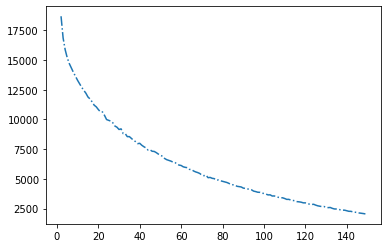

In [53]:
plt.plot(klusters, inertions, '-.')

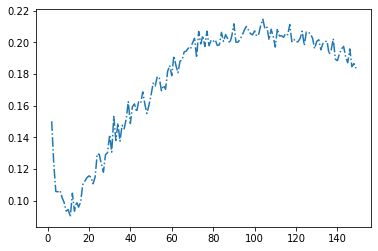

In [54]:
plt.plot(klusters, silh_scores, '-.')

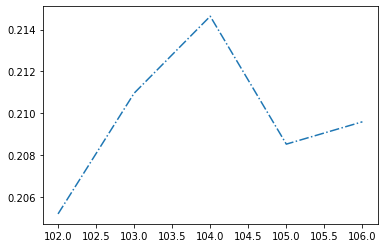

In [58]:
plt.plot(klusters[100:105], silh_scores[100:105], '-.')

In [59]:
kmeans = KMeans(n_clusters=104)

kmeans.fit(X_train)

KMeans(n_clusters=104)